In [1]:
# Это нужно, чтоб увидеть NEURON
import sys
sys.path.append("/home/leon/nrn/build/lib/python")

import os
os.chdir("../..")

from scripts.NEURON_Sim_Wrapper import Network

# Строим Сеть
Это нужно делать один раз и далее проводить уже на ней все симуляции.

Тут мы создаем сеть из нейрона `7594047`, `15741865`. Согласно графу, тут имеется 4 синапсов из первого нейрона во второй (в обратную сторону их нет). По этому далее будем стимулировать `7594047`.
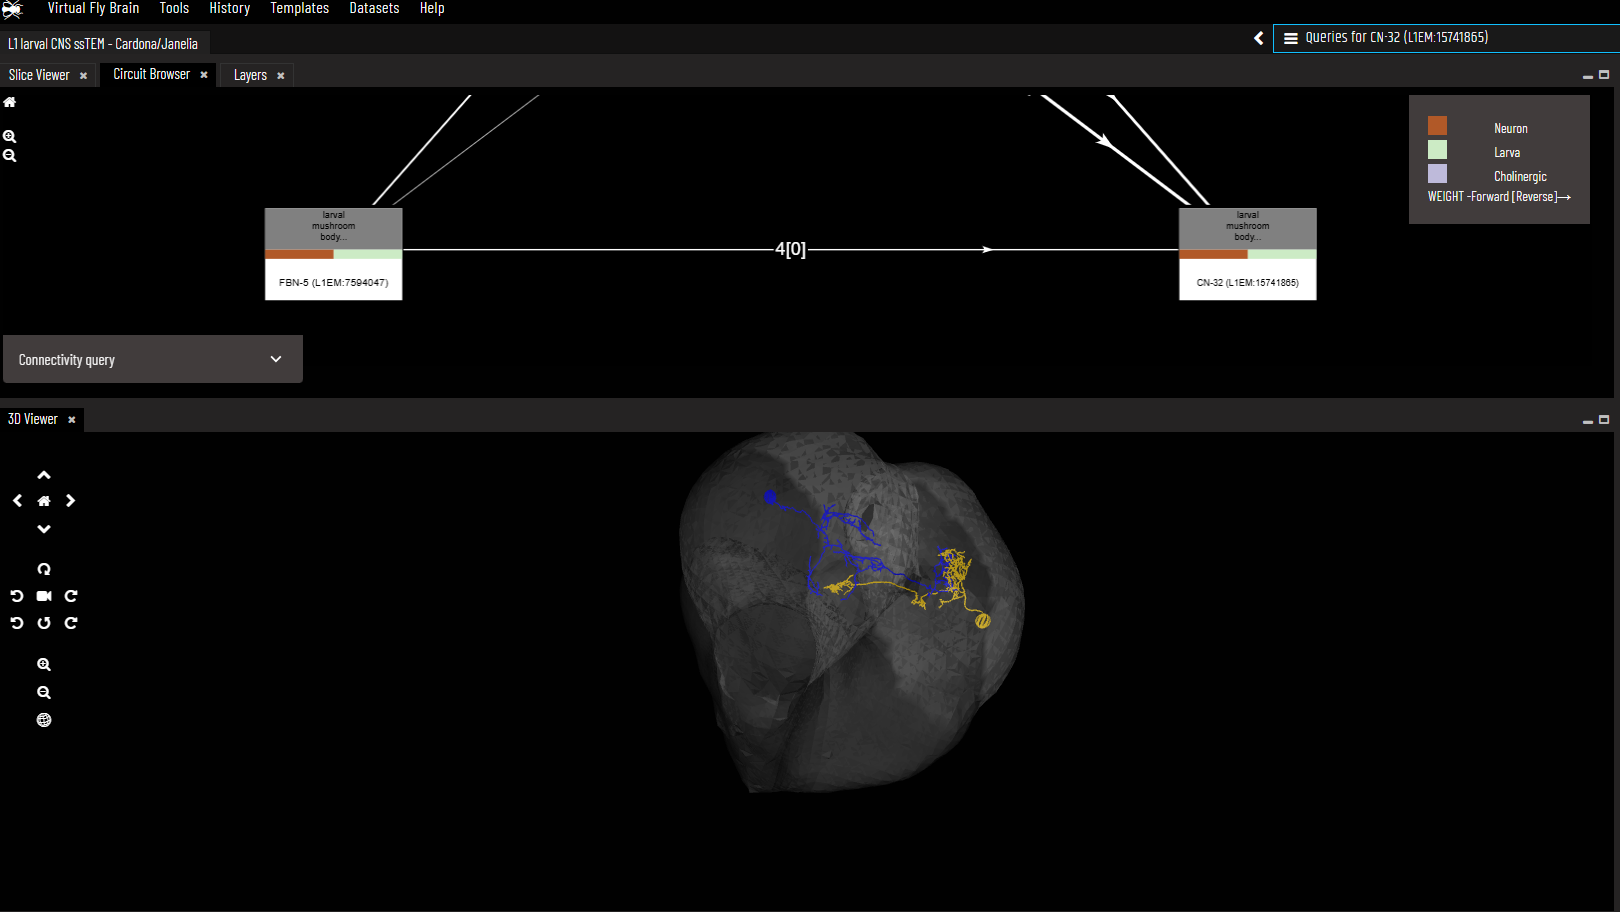


In [2]:
neuron_ids = ['7594047', '15741865']

net = Network(neuron_ids)
net.load_graphs()

soma_params = {
    'L': 20,            # длина
    'diam': 20,         # диаметр
    'Ra': 100,          # аксиальное сопротивление
    'cm': 1,            # емкость мембраны
    
    'gnabar_hh': 0.12,  # проводимость натриевых каналов
    'gkbar_hh': 0.036,  # проводимость калиевых каналов
    'gl_hh': 0.0003,    # утечка (leak) проводимость
    'el_hh': -54.3      # обратный потенциал утечки
}
dend_params = {
    'L': 50.0,          # длина
    'diam': 2.0,        # диаметр
    'Ra': 100.0,        # сопротивление
    'cm': 1.0,          # емкость
    
    'g_pas': 0.0001,    # пассивная проводимость
    'e_pas': -70.0      # обратный потенциал
}
net.build_sections(soma_params=soma_params, dendrite_params=dend_params)
net.connect_morphology()


syn_params = {
    'tau1': 0.5,        # время нарастания
    'tau2': 2.0,        # время спада
    'e': 0.0             # обратный потенциал (возбуждающий)
}
netcon_params = {
    'threshold': -69.8,  # порог (мВ) *это просто чтоб показать работоспособность
    'weight': 0.5,       # вес синапса (микросименсы)
    'delay': 3.0         # задержка (мс)
}
net.build_synapses(synapse_params=syn_params, netcon_params=netcon_params)

number of neurons: 2 



# Запускаем Симуляцию

В этом случае запускаем стимуляцию `7594047` и слушаем сомы обоихнейронов.
    
p.s. после каждой симуляции сбрасываем состояния.

In [3]:
# Configure the simulation
net.setup_recording(neurons=["7594047", "15741865"])
net.setup_stimulus(neurons=["7594047"], start_time=10, duration=30, amplitude=2)

# запускаем симуляцию
t, voltages = net.run(duration=100)

net.analyze(t, voltages)

net.reset()

ANALYZATION 

Spikes crossing 0 mV:
7594047: 56 SPIKES at (TODO) 10.549999999999935
{neuron_id}: no spike
Maximum depolirazation
7594047: 112.93609309880202 mV
15741865: 3.325700091331143 mV


# Рассмотрим Активность на Произвольних Участках Каждого Нейрона

Нарисуем 2 графика: активность произвольных секций нейрона `7594047` и активность произвольных секций нейрона `15741865` (для удобства просто проведем 2 симуляции с разными рекордерами).

На первом графике, первый нейрон (который стимулируется) выдает 4-5 спайков, которые "размазывает" по времени и амплитуде, в зависимости от сегмента, который рассматриваем. Так до сегментов доходит очень слабый потенциал < -66 мв.

На втором графике, второй нейрон (который принимает) получает синаптический ток от первого нейрона. По видимому, амплитуды первого нейрона хватило только на одно срабатывание синапса (первый импульс самый мощный).

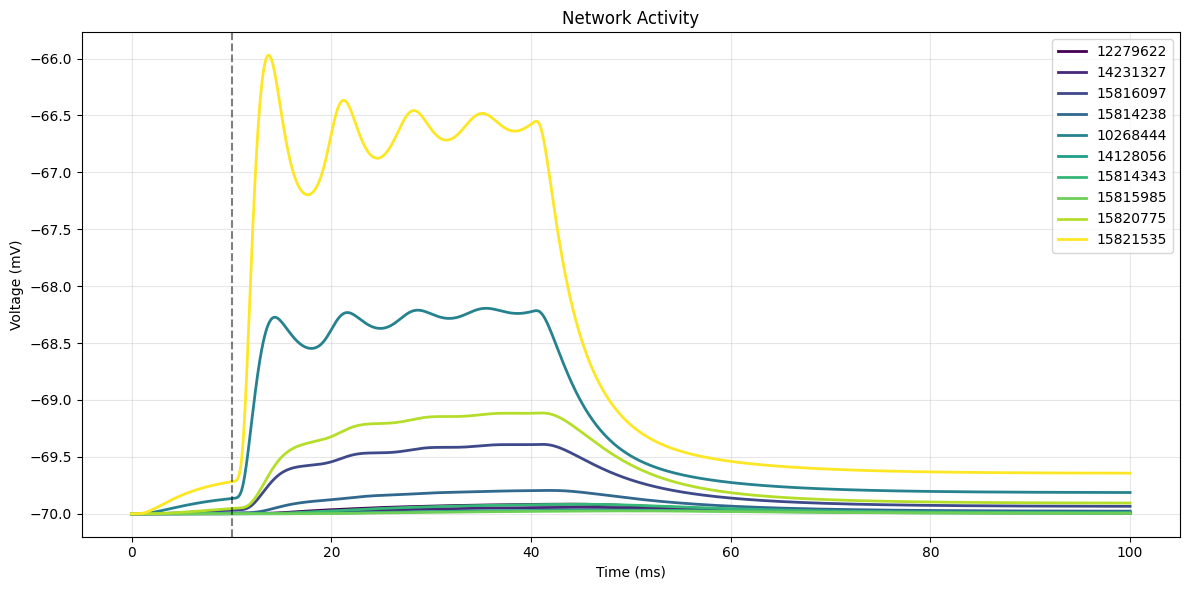

In [4]:
# это для нейрона 7594047
n1_sections=["12279622", "14231327", "15816097", "15814238", "10268444", "14128056", "15814343", "15815985", "15820775", "15821535"]

# Configure the simulation
net.setup_recording(sections=n1_sections)
net.setup_stimulus(neurons=["7594047"], start_time=10, duration=30, amplitude=2)

# запускаем симуляцию
t, voltages = net.run(duration=100)
net.plot_results(t, voltages)
net.reset()

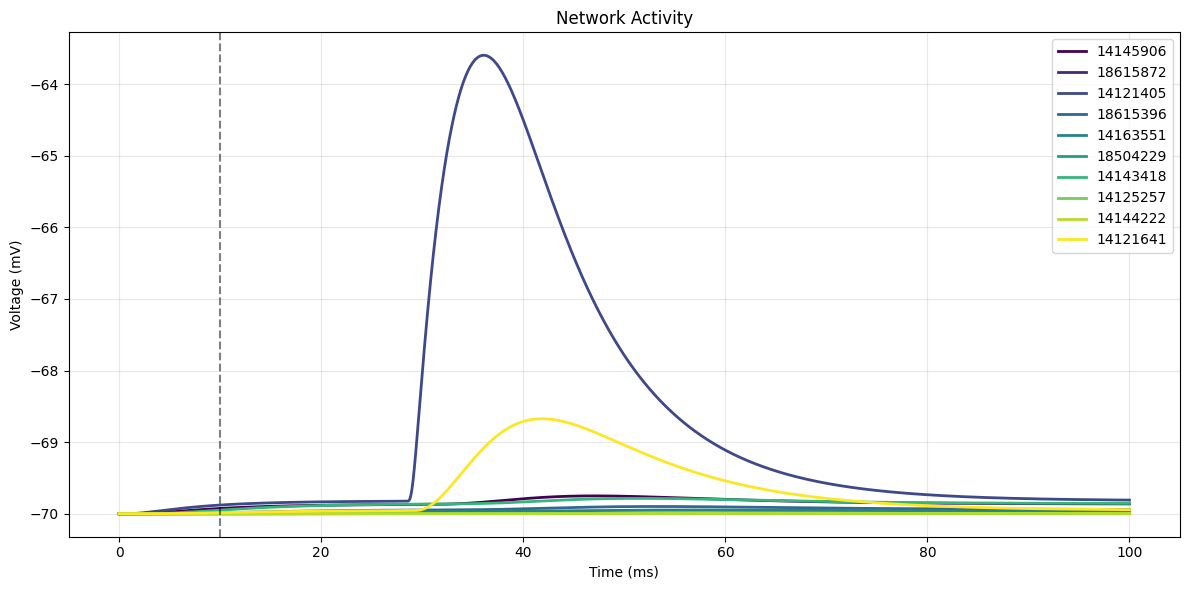

In [7]:
# это для нейрона 15741865
n2_sections=["14145906", "18615872", "14121405", "18615396", "14163551", "18504229", "14143418", "14125257", "14144222", "14121641"]

# Configure the simulation
net.setup_recording(sections=n2_sections)
net.setup_stimulus(neurons=["7594047"], start_time=10, duration=30, amplitude=2)

# запускаем симуляцию
t, voltages = net.run(duration=100)
net.plot_results(t, voltages)
net.reset()

# Рассмотрим Активность Прямо на Pre/Post Синаптических Сегментах

Посмотрим на второй по счету синапс, ибо он ближе вс его к соме стимулируемого нейрона.

На графике pre (`12284139`) и post (`22443278`) ноды прямо между синапсом. Видно, что post синапс отработал, а pre как буд-то пустой, но это не так. Если приблизить, то там видно, что дошел слабый сигнал (собственно -69.8 мВ) который и тригернул синапс. Собственно по этому, из-за масштаба не видно pre активность.

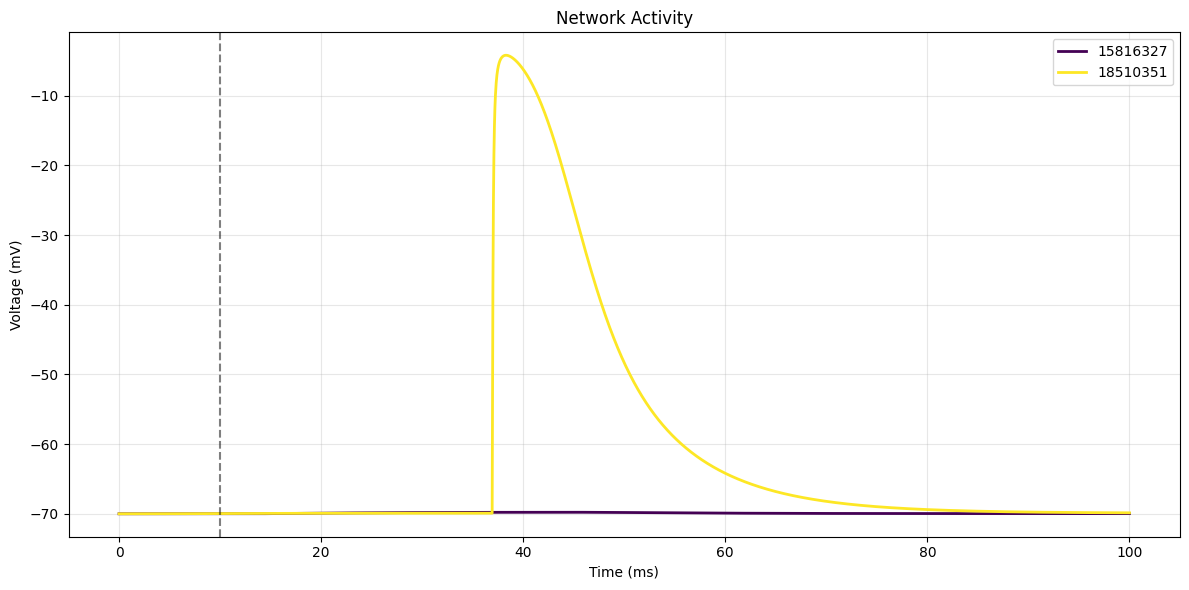

In [8]:
# Test synapses
# syn_1_sections=["8869101", "15814377"]
syn_2_sections=["15816327", "18510351"]
# syn_3_sections=["12284139", "22443278"]
# syn_4_sections=["12284164", "18292354"]


# Configure the simulation
net.setup_recording(sections=syn_2_sections)
net.setup_stimulus(neurons=["7594047"], start_time=10, duration=30, amplitude=2)

# запускаем симуляцию
t, voltages = net.run(duration=100)
net.plot_results(t, voltages)
net.reset()